# Lab 1 (TextProcessing and WordCloud)

Name: Ashritha Gugire
Professor : Dr. Lindi Liao

In [26]:
# download and import NLTK
# installed nltk and wordcloud in anaconda prompt after creating a new own environment 
import nltk , re
from nltk.probability import FreqDist

In [27]:
#1.1 load a text file
#def process_text_file(file_path):
file= open("C:\\Users\\ashri\\Documents\\AIT-526\\Lab1.txt" , "r", encoding = 'utf-8')
mytext = file.read()

In [28]:
#1.2 Tokenizing and printing first 20 words
sentences = nltk.sent_tokenize(mytext)
tokens = nltk.word_tokenize(mytext)
print(f"number of sentences",len(sentences))
print(FreqDist(tokens))
print("list of first 20 words",tokens[:20])

number of sentences 6394
<FreqDist with 6844 samples and 98781 outcomes>
list of first 20 words ['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [29]:
#1.3 remove punctuations and print first 20 words
# firslty let's covert them to lower case and then remove the punctuations
words = [w.lower() for w in tokens]
lToStr = ' '.join([str(elem) for elem in words])
without_pun=re.split(r'\W+', lToStr)
print(f"number of words after removing punctuations",len(without_pun))
print(FreqDist(without_pun))
print("list of first 20 words after removing punctuations",without_pun[:20])

number of words after removing punctuations 81490
<FreqDist with 5771 samples and 81490 outcomes>
list of first 20 words after removing punctuations ['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


In [30]:
#1.4 Remove stop words and count the cleaned words
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words= [word for word in without_pun if word.lower() not in stopwords.words('english')]
print(f"number of words without stop words",len(stop_words))
print(stop_words[:50])
print(FreqDist(stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


number of words without stop words 41870
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'n', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drills', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley', 'thin']
<FreqDist with 5630 samples and 41870 outcomes>


In [31]:
#Lemmantization
#1.5 lemmantize the cleaned words and count the words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()

lemmatized_words = [lemma.lemmatize(t) for t in stop_words]
print("lemmatized word Count:", len(lemmatized_words))
print(lemmatized_words[:50])
print(FreqDist(lemmatized_words))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


lemmatized word Count: 41870
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mr', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'n', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drill', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mr', 'dursley', 'thin']
<FreqDist with 5111 samples and 41870 outcomes>


<FreqDist with 5111 samples and 41870 outcomes>
[('harry', 1327), ('n', 834), ('said', 794), ('ron', 429), ('hagrid', 370), ('could', 303), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('got', 207), ('get', 203), ('like', 195), ('see', 181), ('professor', 181)]


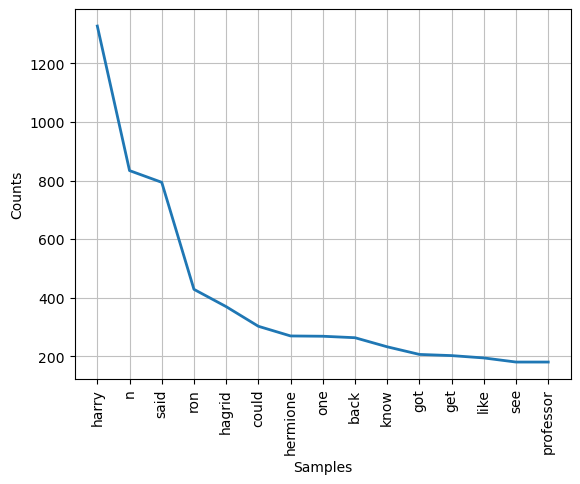

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
#1.6 Calculate the word distribution and plot and list only top 15 words.
freq_dist = FreqDist(lemmatized_words)
print(freq_dist)
print(freq_dist.most_common(15))
freq_dist.plot(15)


(-0.5, 399.5, 199.5, -0.5)

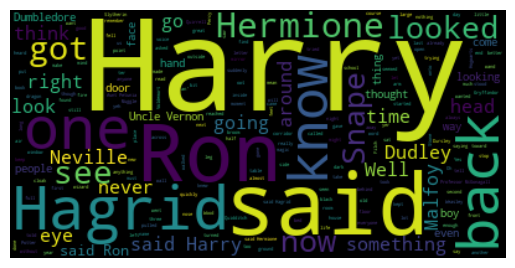

In [38]:
#2.1 wordclouds from original text(without stopwords)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(mytext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

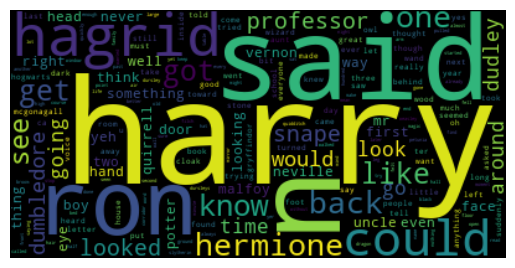

In [36]:
#2.2 wordcloud for the processed data in Task1
processed_cloud= WordCloud().generate_from_frequencies(freq_dist)
plt.imshow(processed_cloud, interpolation = 'bilinear')
plt.axis("off")